In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [11]:
df = pd.read_csv('advertising2.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [12]:
from sklearn.model_selection import train_test_split

X = df[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = df['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

### Metrics : 

In [19]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

### AdaBoosting : 

In [14]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(random_state = 42)
ada_model.fit(X_train, y_train)

eval_metric(ada_model, X_train, y_train, X_test, y_test)

Test_Set
[[41  3]
 [ 4 52]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        44
           1       0.95      0.93      0.94        56

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100


Train_Set
[[454   2]
 [ 12 432]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       456
           1       1.00      0.97      0.98       444

    accuracy                           0.98       900
   macro avg       0.98      0.98      0.98       900
weighted avg       0.98      0.98      0.98       900



### Cross Validate Control : 

In [15]:
from sklearn.model_selection import cross_validate

model = AdaBoostClassifier(random_state= 101)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.960000
test_precision    0.968795
test_recall       0.950505
test_f1           0.958988
dtype: float64

### Adaboosting_Parametres :

#### Çalışma Prensibi : 

İlk ağaçta yaptığı hataları ağırlıklandırarak diğer ağaca aktarır. hatalı değerleri bir sonraki ağaçta bilmeye çalışır. random forest gibi demokratik bir model değildir. örneğin n_estimator sayımız 3 olsun. 3 ağaçta 2 tane 0, 1 tane 1 classını tahmin etsin, random forestte otomatik olarak 0 classını tahmin değeri olarak atar. 

ama adaboosting te ise her class için bir ağırlık katsayısı atar. elimizde 3 tane ağaç olsun. 1 tahmin edilen classın ağırlıklandırma katsayısı 0.7 olsun, 0 tahmin edilen ilk classın ağırlıklandırma katsayısı 0.2, yine 0 tahmin edilen 2. classın ağırlıklandırma katsayısı 0.3 olsun. 0.7 > (0.2 + 0.3) olduğu için otomatik olarak 1 değerini atayacaktır.

#### n_estimator : 
modelde kullanılacak ağaç sayısını belirler. default değeri 50 dir. 

#### learning_rate : 
default değeri 1 dir. değer arttıkça hatalı gözlemlerin bir sonraki ağaçta ki değerleri de artacaktır. o yüzden fazla büyük olursa overfiting olabilir. 

In [16]:
model = AdaBoostClassifier(random_state = 42, n_estimators= 550, learning_rate= 2.0)
model.fit(X_train, y_train)

eval_metric(model, X_train, y_train, X_test, y_test)

# learning_rate sayısını 2.0 verdik ve tahmin skorlarımızı berbat etti. ağaç sayımızı da arttık ve skorlar çöp çıktı. 
# o yüzden grid search cv ile yapılması daha mantıklı olacaktır.

Test_Set
[[ 4 40]
 [47  9]]
              precision    recall  f1-score   support

           0       0.08      0.09      0.08        44
           1       0.18      0.16      0.17        56

    accuracy                           0.13       100
   macro avg       0.13      0.13      0.13       100
weighted avg       0.14      0.13      0.13       100


Train_Set
[[ 42 414]
 [339 105]]
              precision    recall  f1-score   support

           0       0.11      0.09      0.10       456
           1       0.20      0.24      0.22       444

    accuracy                           0.16       900
   macro avg       0.16      0.16      0.16       900
weighted avg       0.16      0.16      0.16       900



In [20]:
ada_model = AdaBoostClassifier(learning_rate= 0.1, n_estimators= 100)
ada_model.fit(X_train, y_train)
y_pred = ada_model.predict(X_test)
ada_f1 = f1_score(y_test, y_pred)
ada_recall = recall_score(y_test, y_pred)
ada_auc = roc_auc_score(y_test, y_pred)

eval_metric(ada_model, X_train, y_train, X_test, y_test)

Test_Set
[[40  4]
 [ 3 53]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        44
           1       0.93      0.95      0.94        56

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100


Train_Set
[[453   3]
 [ 18 426]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       456
           1       0.99      0.96      0.98       444

    accuracy                           0.98       900
   macro avg       0.98      0.98      0.98       900
weighted avg       0.98      0.98      0.98       900



### GradientBoosting : 

### Gradient Boosting çalışma mantığı : 

gerçek değerler ile tahmin edilen değerleri çıkrarır ve bu değeri her ağaçta 0 ra yaklaştırmaya çalışır. classifier da ise class değerlerinin oranını logaritmasını alır. ve çıkan olasılık değerini ilk başlangıç olasılığını belirler. 0.5 ten büyükse 1 değeri atar, 0.5 ten küçükse 0 değeri atar. sonrasında bir sonraki ağaca geçerken tüm olasılık değeri toplamı olan 1 den bulunan olasılık değeri çıkarılır ve bu değer learnin_rate değeri ile çarpılır. sonuç 0.5 ten küçükse 0, 0.5 ten büyükse 1 olarak değer atar. 

### Gradient Boosting Parametres : 

#### loss : 
default değeri deviance dir. yani olasılıklara çevirme işleminde logistic regression kullanır demektir. fakat ridge ve lasso kısmı ile oynayamıyoruz. 

#### learnin_rate : 
gerçek değerlerden tahmin edilen değer çıkarılır. ve bu fark 0 değerine yaklaştırılırken fark ile çarpılan kat sayıdır. yani bir sonraki ağaca ne kadar katkı alacağımızı gösterir. değer arttıkça ağaç sayısı da azalmalıdır.

#### subsample : 
Default değer 1.0 dır. yani tüm değerleri ilk ağaca vererek başla ve diğer ağaçlarda tüm değerleri kullan demektir. genelde 0.5, 0.8 ve 1.0 tercih edilir.

#### criteon : 
Ağaçları bölme kriteridir. regression için default değeri mse dur. class için ise fridmean ile optimasyon edilmiş halini kullanır.

#### min_sample_split :
Yaprak olma şartı

#### max_depth : 
ağacın ne kadar derinlemesine inmesini belirten şarttır. default değeri 3 tür.

#### max_features :
her bölünmedeki max featuresleri rastgele seçer, istersek değiştirebiliriz.

#### gamma değeri :
Overfiting olursa train setinden test setinden bias değeri ekler.

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

gr_model = GradientBoostingClassifier(random_state= 101)
gr_model.fit(X_train, y_train)

eval_metric(gr_model, X_train, y_train, X_test, y_test)

Test_Set
[[41  3]
 [ 2 54]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        44
           1       0.95      0.96      0.96        56

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100


Train_Set
[[456   0]
 [  1 443]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       456
           1       1.00      1.00      1.00       444

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



### Cross Validate : 

In [22]:
from sklearn.model_selection import cross_validate

model = GradientBoostingClassifier(random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.952222
test_precision    0.958870
test_recall       0.945960
test_f1           0.951603
dtype: float64

In [29]:
gr_model = GradientBoostingClassifier(n_estimators= 30, learning_rate= 0.64)
gr_model.fit(X_train, y_train)
y_pred = gr_model.predict(X_test)

gr_f1 = f1_score(y_test, y_pred)
gr_recall = recall_score(y_test, y_pred)
gr_auc = roc_auc_score(y_test, y_pred)

eval_metric(gr_model, X_train, y_train, X_test, y_test)

Test_Set
[[42  2]
 [ 2 54]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        44
           1       0.96      0.96      0.96        56

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100


Train_Set
[[456   0]
 [  0 444]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       456
           1       1.00      1.00      1.00       444

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



### XGBoosting : 

In [30]:
!pip install xgboost

In [33]:
from xgboost import XGBClassifier

### parametreleri : 

#### objective : 
loss un aynısıdır. yine olasılık hesabı için logistic regression kullanılmaktadır. 

#### booster:
default değeri decision tree dir. 

#### reg_alpha : 
default değeri 0 dır yani lasso dur.

#### reg_lambda :
default değeri 1 dir. yani ridge dir. 

#### learning_rate : 
her ağaç için hata farklarını çarptığımız katsaı değeri.

#### n_estimator :
ağaç sayısı

#### max_depth :
ağacın derinlik sayısı

#### min_child_weight : 
overfiting durumu olursa değeri arttırılıp ta bakılabilir. lasso gibi müdahele eder. default değeri 1.0 dır. değeri arttıkça overfitinge o kadar sert müdahele eder. 

#### gamma : 
overfiting durumuda train setinden test setine aktarım yapan bias değeridir. değeri arttıkça overfitinge müdahele eder.

#### base_score :
0.5 default değeridir. olasılık hesabıdır. 

#### scale_pos_weight : 
Default değeri 1 dir. classifier da class değerleri arasında ki oranın yazılması tavsiye edilir. örneğin 100 tane 1, 10 tane 0 değeri olsun. 100/ 10 = 10 olur. ve 10 değeri verilebilir.

In [42]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
eval_metric(xgb_model, X_train, y_train, X_test, y_test)

[14:01:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Test_Set
[[40  4]
 [ 3 53]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        44
           1       0.93      0.95      0.94        56

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100


Train_Set
[[456   0]
 [  0 444]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       456
           1       1.00      1.00      1.00       444

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 0.8}

In [50]:
xgb_model = XGBClassifier(random_state=42, colsample_bytree = 0.5, learning_rate = 0.1, max_depth = 3, n_estimators = 100,
                         subsample = 0.8, gamma = 3.0, min_child_weight = 3)
xgb_model.fit(X_train, y_train)
eval_metric(xgb_model, X_train, y_train, X_test, y_test)

[14:05:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Test_Set
[[40  4]
 [ 3 53]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        44
           1       0.93      0.95      0.94        56

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100


Train_Set
[[453   3]
 [ 19 425]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       456
           1       0.99      0.96      0.97       444

    accuracy                           0.98       900
   macro avg       0.98      0.98      0.98       900
weighted avg       0.98      

In [51]:
xgb_f1 = f1_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_auc = roc_auc_score(y_test, y_pred)

### Graphips : 

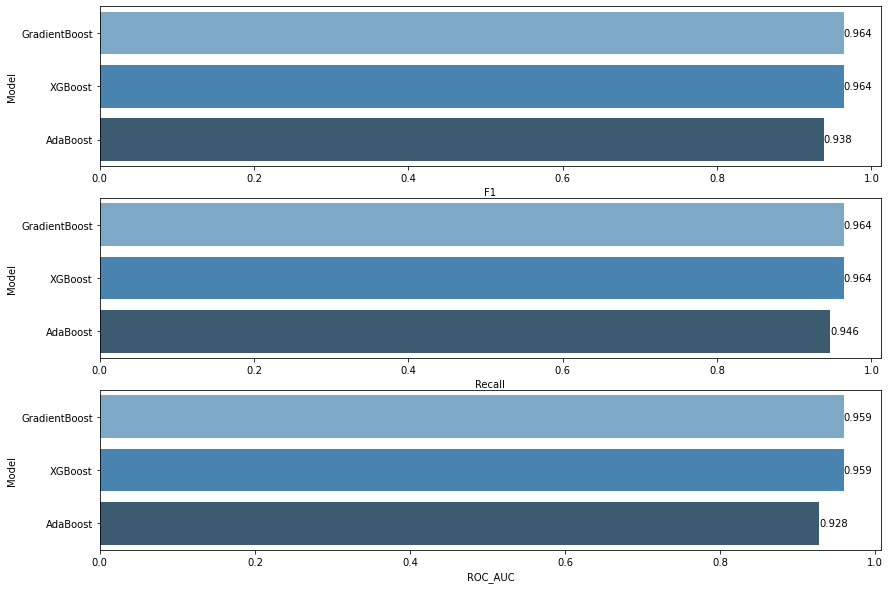

In [52]:
compare = pd.DataFrame({"Model": ["AdaBoost",
                                 "GradientBoost", "XGBoost"],
                        "F1": [ada_f1, gr_f1, xgb_f1],
                        "Recall": [ada_recall, gr_recall, xgb_recall],
                        "ROC_AUC": [ada_auc, gr_auc, xgb_auc]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax=sns.barplot(x="ROC_AUC", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()